In [151]:
%matplotlib inline
import pandas as pd
import pandasql as ps
from datetime import datetime
import seaborn
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'svg'
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5

In [152]:
user_usage = pd.read_csv('Documents/ml/user.data.csv')
userdevice = pd.read_csv('Documents/ml/userdevice.data.csv')
devices = pd.read_csv('Documents/ml/devices.data.csv')

In [153]:
df1=pd.DataFrame.from_csv('Documents/ml/user.data.csv')
df2=pd.DataFrame.from_csv('Documents/ml/userdevice.data.csv')

C:\Users\Donia\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  """Entry point for launching an IPython kernel.
C:\Users\Donia\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  


In [154]:
user_usage.head()


,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id
0,21.97,4.82,1557.33,22787
1,1710.08,136.88,7267.55,22788
2,1710.08,136.88,7267.55,22789
3,94.46,35.17,519.12,22790
4,71.59,79.26,1557.33,22792


In [155]:

userdevice.head()

,use_id,user_id,platform,platform_version,device,use_type_id
0,22782,26980,ios,10.2,iPhone7.2,2
1,22783,29628,android,6.0,Nexus 5,3
2,22784,28473,android,5.1,SM-G903F,1
3,22785,15200,ios,10.2,iPhone7.2,3
4,22786,28239,android,6.0,ONE E1003,1


In [156]:
devices.head()

,Retail Branding,Marketing Name,Device,Model
0,NaN,NaN,AD681H,Smartfren Andromax AD681H
1,NaN,NaN,FJL21,FJL21
2,NaN,NaN,T31,Panasonic T31
3,NaN,NaN,hws7721g,MediaPad 7 Youth 2
4,3Q,OC1020A,OC1020A,OC1020A


Integration

In [157]:
def example1_pandas(user_usage, userdevice):
    join_df = pd.merge(user_usage,
                 userdevice[['use_id', 'platform', 'device']],
                 on='use_id')
return join_df

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id,platform,device
0,21.97,4.82,1557.33,22787,android,GT-I9505
1,1710.08,136.88,7267.55,22788,android,SM-G930F
2,1710.08,136.88,7267.55,22789,android,SM-G930F
3,94.46,35.17,519.12,22790,android,D2303
4,71.59,79.26,1557.33,22792,android,SM-G361F
5,71.59,79.26,1557.33,22793,android,SM-G361F
6,71.59,79.26,519.12,22794,android,SM-G361F
7,71.59,79.26,519.12,22795,android,SM-G361F
8,30.92,22.77,3114.67,22799,android,ONEPLUS A3003
9,69.80,14.70,25955.55,22801,android,GT-I9505


In [175]:
# pandasql code
def example1_pandasql(user_usage, userdevice):
    join_query = '''
        SELECT 
        FROM user_usage as uu JOIN userdevice as ud ON (uu.use_id=ud.use_id)
    '''
    join_df = ps.sqldf(join_query, locals()).set_index('status')
return join_df

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id,platform,device
0,21.97,4.82,1557.33,22787,android,GT-I9505
1,1710.08,136.88,7267.55,22788,android,SM-G930F
2,1710.08,136.88,7267.55,22789,android,SM-G930F
3,94.46,35.17,519.12,22790,android,D2303
4,71.59,79.26,1557.33,22792,android,SM-G361F
5,71.59,79.26,1557.33,22793,android,SM-G361F
6,71.59,79.26,519.12,22794,android,SM-G361F
7,71.59,79.26,519.12,22795,android,SM-G361F
8,30.92,22.77,3114.67,22799,android,ONEPLUS A3003
9,69.80,14.70,25955.55,22801,android,GT-I9505


Aggregation

In [159]:
#pandas
def example2_pandas(join_df):
    return pd.DataFrame(join_df.groupby('platform')[['monthly_mb']].sum())

In [160]:
#pandasql
def example2_pandasql(join_df):
    aggr_query = '''
        SELECT 
            sum(monthly_mb) as monthly_mb,
            platform
        FROM join_df 
        GROUP BY platform
        '''
    return ps.sqldf(aggr_query, locals()).set_index('platform')

In [161]:
example2_pandas(join_df)

,monthly_mb
platform,
android,662757.89
ios,1922.31


In [162]:
platform_engagement = example2_pandasql(join_df)
platform_engagement

,monthly_mb
platform,
android,662757.89
ios,1922.31


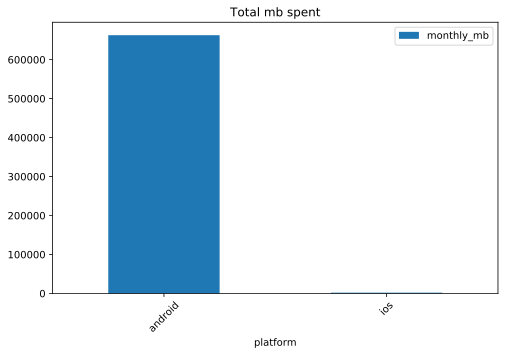

In [163]:
platform_order = ['android', 'ios']
platform_engagement.loc[platform_order].plot(kind = 'bar', rot = 45, title = 'Total mb spent')

Estimating time elapsed

In [164]:
import time

def count_mean_time(func, params, N =5):
    total_time = 0
    for i in range(N):
        time1 = time.time()
        if len(params) == 1:
            tmp_df = func(params[0])
        elif len(params) == 2:
            tmp_df = func(params[0], params[1])
        time2 = time.time()
        total_time += (time2 - time1)
    return total_time/N

1st task

In [165]:
ex2_times = []
for count in range(1000, 137000, 1000):
    pandasql_time = count_mean_time(example2_pandasql, [join_df[:count]])
    pandas_time = count_mean_time(example2_pandas, [join_df[:count]])
    ex2_times.append({'count': count, 'pandasql_time': pandasql_time, 'pandas_time': pandas_time})

In [166]:

ex2_times_df = pd.DataFrame(ex2_times)

In [167]:
ex2_times_df.columns = ['number of rows in platform_engagements', 'pandas time', 'pandasql time']
ex2_times_df = ex2_times_df.set_index('number of rows in platform_engagements')

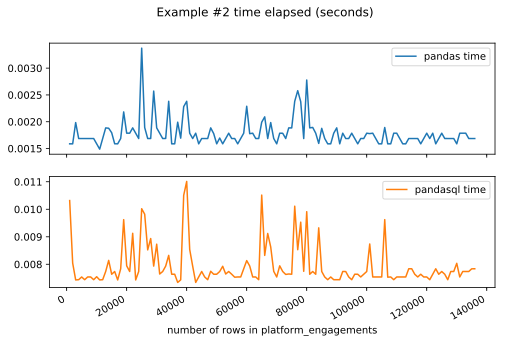

In [168]:
ax = ex2_times_df.plot(title = 'Example #2 time elapsed (seconds)', subplots = True)

2nd task

In [176]:
all_users = user_usage.use_id.unique().tolist()
len(all_users)

240

In [177]:
ex1_times = []
for users_count in range(10, 1310, 10):
    users = all_users[:users_count]
    user_usage_sample = user_usage[user_usage.use_id.isin(users)]
    userdevice_sample = userdevice[userdevice.use_id.isin(users)]
    count = userdevice_sample.shape[0]
    pandasql_time = count_mean_time(example1_pandasql, [user_usage_sample, userdevice_sample])
    pandas_time = count_mean_time(example1_pandas, [user_usage_sample, userdevice_sample])
    ex1_times.append({'count': count, 'pandasql_time': pandasql_time, 'pandas_time': pandas_time})

PandaSQLException: (sqlite3.OperationalError) near "FROM": syntax error [SQL: '\n                SELECT \n                FROM user_usage as uu JOIN userdevice as ud ON (uu.use_id=ud.use_id)\n            '] (Background on this error at: http://sqlalche.me/e/e3q8)

In [150]:
ex3_times_df = pd.DataFrame(ex3_times).set_index('count')

NameError: name 'ex3_times' is not defined

In [ ]:
ax = ex3_times_df.plot(title = 'Example #3 time elapsed')
ax.set_xlabel('number of rows in daily_engagements')
ax.set_ylabel('time, seconds')